# Calculating Entanglement Spectrum for Parameterized Quantum Circuits (PQCs)

In this tutorial, we will learn how to calcualte entanglement spectrum of Parameterized Quantum Circuits (PQCs) using qLEET. We look at different parameterized states generated by the sampled ensemble of parameters for a given PQC. We then compare the resulting distribution of eigenvalues of the bipartite state generated by this sampled ensemble to that of the ensemble of eigenvalues of Haar random states.

We currently support two measures to calculate entanglement spectrum divergence (ESD) - **Kullback–Leibler Divergence** and **Jensen–Shannon Divergence**
$$ ESD = D_{KL}(\hat{P}_{PQC}(H_{\text{ent}}; \theta) | P_{Haar}(H_{\text{ent}})) $$
$$ ESD = D_{\sqrt{JSD}}(\hat{P}_{PQC}(H_{\text{ent}}; \theta) | P_{Haar}(H_{\text{ent}})) $$

In [1]:
# necessary imports 
import numpy as np
import qiskit
import qleet

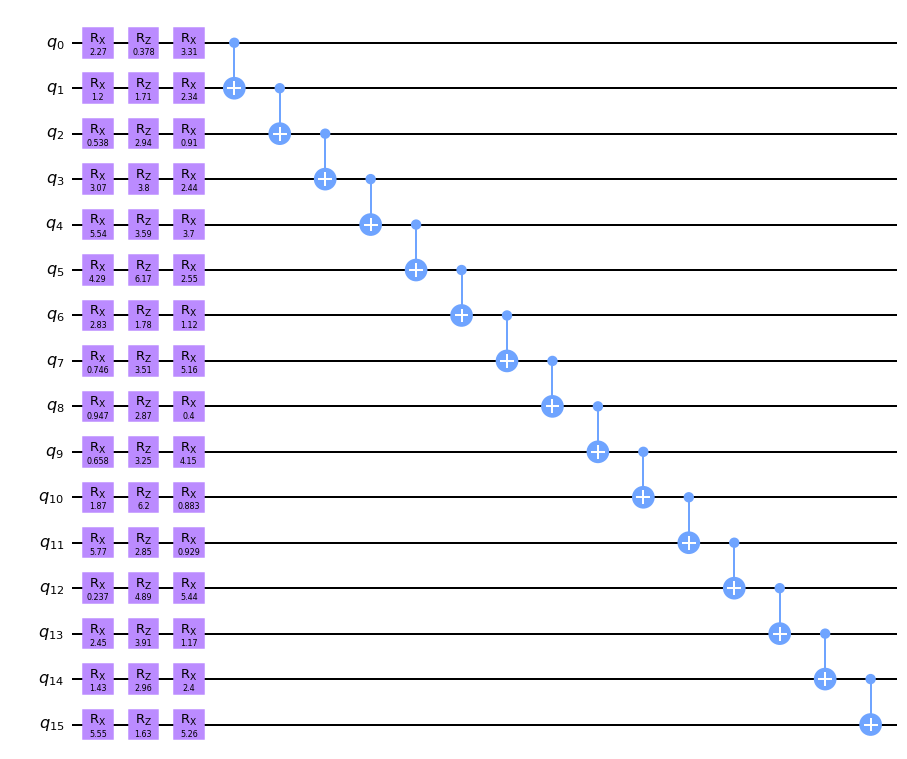

In [2]:
def ansatz(params, cparams=None):
    layers, num_qubits, depth = params.shape
    ansatz = qiskit.QuantumCircuit(num_qubits)
    for idx in range(layers):
        if idx:
            ansatz.barrier()
        for ind in range(num_qubits):
            ansatz.rx(params[idx][ind][0], ind)
            ansatz.rz(params[idx][ind][1], ind)
            ansatz.rx(params[idx][ind][2], ind)
        for ind in range(num_qubits-1):
            ansatz.cx(ind, ind+1)
    return ansatz

ansatz(np.random.uniform(0, 2*np.pi, (1, 16, 3))).draw("mpl")

In [3]:
from tqdm.notebook import tqdm
data = []
results = []
num_qubits = 12
for idx in tqdm(range(1, 17)):
    params = np.array([qiskit.circuit.Parameter(fr"$θ_{idx}$") for idx in range(idx*num_qubits*3)])
    qiskit_descriptor = qleet.CircuitDescriptor(
        circuit=ansatz(np.array(params).reshape((idx, num_qubits, 3))), 
        params=params, cost_function=None
    )
    qiskit_entanglement_spectrum = qleet.analyzers.entanglement_spectrum.EntanglementSpectrum(
        qiskit_descriptor, samples=100
    )
    pqc_esd, mean_eigvals = qiskit_entanglement_spectrum.entanglement_spectrum("jsd")
    results.append(pqc_esd)
    data.append(mean_eigvals)
data = np.array(data)
results

[0.8599888239653902,
 0.8673653598963497,
 0.8396860261002133,
 0.7584837967442175,
 0.6155593918738712,
 0.3298479792203362,
 0.316704110162869,
 0.3803237280690884,
 0.3728752174663431,
 0.400700873598667,
 0.3888493618739129,
 0.39164602218800765,
 0.39094480334826237,
 0.3633127613822621,
 0.36330758619818776,
 0.3493406945022075]

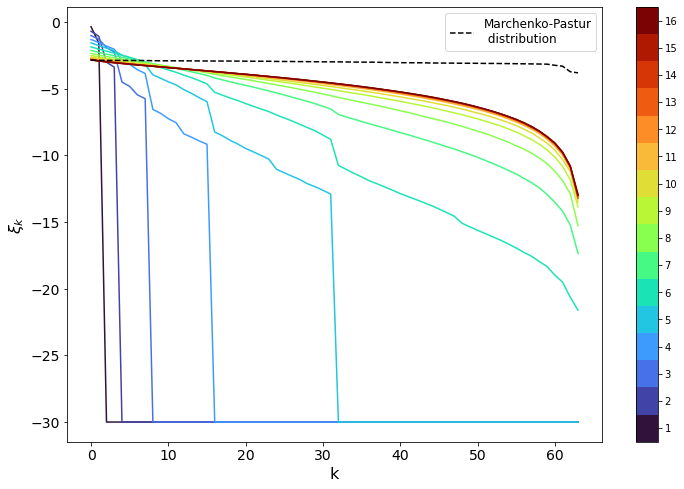

In [4]:
fig = qiskit_entanglement_spectrum.plot(data)

# References

1. Wiersema, Roeland, et al. “Exploring Entanglement and Optimization within the Hamiltonian Variational Ansatz.” PRX Quantum, vol. 1, no. 2, Dec. 2020, p. 020319. APS, https://doi.org/10.1103/PRXQuantum.1.020319.
